In [1]:
import os
os.getcwd()


'C:\\Users\\arpit'

In [3]:
import pandas as pd

df = pd.read_csv("zomato.csv", encoding="ISO-8859-1")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

                                 Restaurant Name  Aggregate rating
8       Spiral - Sofitel Philippine Plaza Manila               4.9
10                              Silantro Fil-Mex               4.9
3                                           Ooma               4.9
9458                                  Urbanologi               4.9
507                     Mazzaro's Italian Market               4.9
509   Mr. Dunderbak's Biergarten and Marketplatz               4.9
429                                Marukame Udon               4.9
428                            Mama's Fish House               4.9
580                                 Punjab Grill               4.9
589                      AB's Absolute Barbecues               4.9


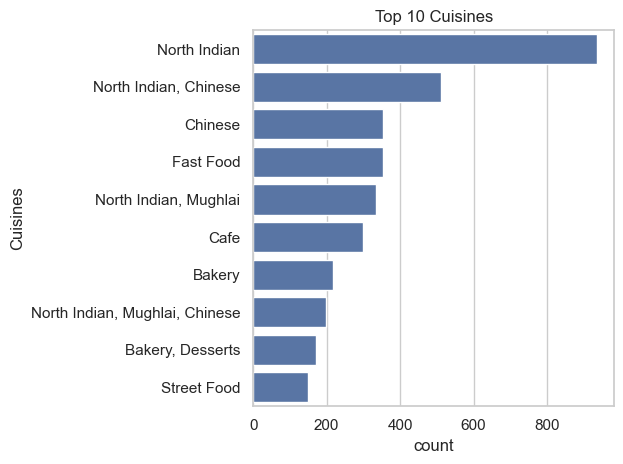

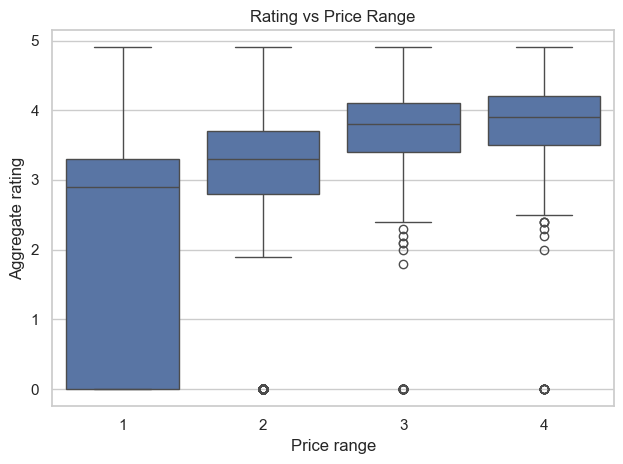

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load your zomato data
df = pd.read_csv("zomato.csv", encoding="ISO-8859-1")

# Optional: Clean column names of extra spaces
df.columns = df.columns.str.strip()

# Step 2: Drop rows with missing rating or price range
df_cleaned = df.dropna(subset=["Aggregate rating", "Price range"])

# Step 3: Top 10 Restaurants by Rating
top10 = df_cleaned.sort_values("Aggregate rating", ascending=False).head(10)
print(top10[["Restaurant Name", "Aggregate rating"]])

# Step 4: Top 10 Cuisines
sns.set(style="whitegrid")
sns.countplot(y=df_cleaned['Cuisines'], order=df_cleaned['Cuisines'].value_counts().head(10).index)
plt.title("Top 10 Cuisines")
plt.tight_layout()
plt.show()

# Step 5: Rating vs Price Range Plot
sns.boxplot(data=df_cleaned, x="Price range", y="Aggregate rating")
plt.title("Rating vs Price Range")
plt.tight_layout()
plt.show()

# Step 6: Save cleaned dataset (for SQL or GitHub)
df_cleaned.to_excel("zomato_cleaned.xlsx", index=False)
